In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.io import arff
import scipy as sc


# Data preparation

In [66]:
# read the concat file from csv 

white_concat = pd.read_csv("FM_WHITE.csv")
red_concat = pd.read_csv("FM_RED.csv")



In [67]:
wine_concat = pd.read_csv("wine")

In [68]:
def get_dataset(frame):
    dffeature = frame.drop(columns=['quality_diff']) if 'quality_diff' in frame.columns else frame #Dropping the quality difference column
    
    np.random.seed(42) #Setting a consistent seed 
    featurematrix = dffeature.to_numpy() #Converting the dataframe into a numpy array 
    
    columns = len(list(dffeature.columns))
    
    X = featurematrix[:,:(columns-1)] #We split the matrix into inputs 
    y = featurematrix[:,columns-1] #Take the last column of the matrix as targets 
    return X, y


In [69]:
wX, wy = get_dataset(white_concat)
rX, ry = get_dataset(red_concat)

In [70]:
wine_concat

,type_1,fixed acidity_1,volatile acidity_1,citric acid_1,residual sugar_1,chlorides_1,free sulfur dioxide_1,total sulfur dioxide_1,density_1,pH_1,...,residual sugar_2,chlorides_2,free sulfur dioxide_2,total sulfur dioxide_2,density_2,pH_2,sulphates_2,alcohol_2,quality_2,Target
0,1.0,7.2,0.24,0.30,1.6,0.048,27.0,131.0,0.9933,3.25,...,1.6,0.048,27.0,131.0,0.99330,3.25,0.45,10.5,5.0,0
1,1.0,7.2,0.24,0.30,1.6,0.048,27.0,131.0,0.9933,3.25,...,7.4,0.044,56.0,189.0,0.99580,3.22,0.48,9.3,6.0,0
2,1.0,7.2,0.24,0.30,1.6,0.048,27.0,131.0,0.9933,3.25,...,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4.0,1
3,1.0,7.2,0.24,0.30,1.6,0.048,27.0,131.0,0.9933,3.25,...,6.5,0.044,28.0,100.0,0.99348,3.12,0.33,10.2,6.0,0
4,1.0,7.2,0.24,0.30,1.6,0.048,27.0,131.0,0.9933,3.25,...,2.4,0.093,30.0,52.0,0.99710,3.19,0.76,11.6,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,8.4,0.62,0.09,2.2,0.084,11.0,108.0,0.9964,3.15,...,1.8,0.032,26.0,74.0,0.98889,2.96,0.35,13.0,8.0,0
9996,0.0,8.4,0.62,0.09,2.2,0.084,11.0,108.0,0.9964,3.15,...,1.1,0.050,24.0,169.0,0.99270,3.15,0.78,9.5,6.0,0
9997,0.0,8.4,0.62,0.09,2.2,0.084,11.0,108.0,0.9964,3.15,...,2.2,0.090,13.0,62.0,0.99660,3.07,0.63,10.5,6.0,0
9998,0.0,8.4,0.62,0.09,2.2,0.084,11.0,108.0,0.9964,3.15,...,12.3,0.048,54.0,145.0,0.99668,3.16,0.42,9.3,6.0,0


In [71]:
X, y = get_dataset(wine_concat)

In [72]:
# Mostly re-use from Antony 
from fomlads.evaluate.eval_regression import train_and_test_partition
from fomlads.evaluate.eval_regression import train_and_test_filter

def dframe_train_test_input_target(dffeature,test_frac):
    """
    This function takes in the new data frame with the feature mapping already applied and converts
    this into training and testing inputs with a split given by the test_fraction. The function should
    output the training inputs and targets as well as the testing inputs and targets. 
    
    
    
    """
    #dffeature = dffeature.drop(columns=['quality_diff'])#Dropping the quality difference column
    
    np.random.seed(1) #Setting a consistent seed 
    featurematrix = dffeature.to_numpy() #Converting the dataframe into a numpy array 
    
    columns = len(list(dffeature.columns))
    
    inputs = featurematrix[:,:(columns-1)] #We split the matrix into inputs 
    targets = featurematrix[:,columns-1] #Take the last column of the matrix as targets 
    
    train_filter,test_filter=train_and_test_filter(len(dffeature),test_frac) #Applying the training and test split for the inputs and targets using our test fraction
    
    train_inputs, train_targets, test_inputs,test_targets = train_and_test_partition(inputs,targets,train_filter,test_filter) 
    
    return train_inputs,train_targets,test_inputs,test_targets #Returning our training and testing inputs and targets
    

In [73]:
W_train_inputs,W_train_targets,W_test_inputs,W_test_targets = dframe_train_test_input_target(white_concat,0.8) #W stands for white

In [74]:
R_train_inputs,R_train_targets,R_test_inputs,R_test_targets = dframe_train_test_input_target(red_concat,0.8) #R stands for Red

# External Model


# Random Forest

In [75]:
# Random Forest 
# import, instantiate 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# instantiate the classifier with n_estimators = 100

rfc_w = RandomForestClassifier(random_state=0)
rfc_r = RandomForestClassifier(random_state=0)

# fit the model to the training set

rfc_w.fit(W_train_inputs,W_train_targets)
rfc_r.fit(R_train_inputs,R_train_targets)

# Predict on the test set results

rfc_w_predict = rfc_w.predict(W_test_inputs)
rfc_r_predict = rfc_w.predict(R_test_inputs)

# Check accuracy score 


print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(W_test_targets, rfc_w_predict)))
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(R_test_targets, rfc_r_predict)))

Model accuracy score with 10 decision-trees : 0.7445
Model accuracy score with 10 decision-trees : 0.6754


In [76]:
# instantiate the classifier with n_estimators = 100

rfc100_w = RandomForestClassifier(n_estimators=100, random_state=0)
rfc100_r = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

rfc100_w.fit(W_train_inputs,W_train_targets)
rfc100_r.fit(R_train_inputs,R_train_targets)

# Predict on the test set results

rfc100_w_predict = rfc100_w.predict(W_test_inputs)
rfc100_r_predict = rfc100_r.predict(R_test_inputs)


# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(W_test_targets, rfc100_w_predict)))
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(R_test_targets, rfc100_r_predict)))

Model accuracy score with 100 decision-trees : 0.7445
Model accuracy score with 100 decision-trees : 0.8084


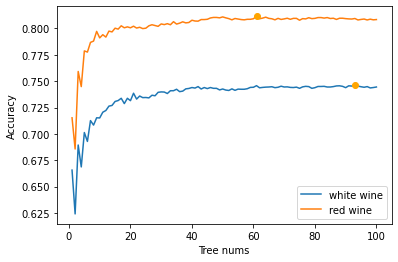

In [77]:
# find the best parameter of n_estimators
# plot the image and note the best point
def RF_ntrees(min_trees, max_trees):
    x = [x for x in range(min_trees, max_trees)]
    scores_w, scores_r = [], []
    for trees in x:
        rfc_w = RandomForestClassifier(n_estimators = trees, random_state = 0)
        rfc_r = RandomForestClassifier(n_estimators = trees, random_state = 0)
        
        rfc_w.fit(W_train_inputs,W_train_targets)
        rfc_r.fit(R_train_inputs,R_train_targets)
        
        rfc_w_predict = rfc_w.predict(W_test_inputs)
        rfc_r_predict = rfc_r.predict(R_test_inputs)
        
        scores_w.append(accuracy_score(W_test_targets, rfc_w_predict))
        scores_r.append(accuracy_score(R_test_targets, rfc_r_predict))
    
    score_max_w = max(scores_w)
    score_max_r = max(scores_r)
    
    plt.plot(x, scores_w, label = 'white wine')
    plt.plot(x, scores_r, label = 'red wine')
    plt.plot(scores_w.index(score_max_w) + 1, score_max_w, 'o', color = 'orange')
    plt.plot(scores_r.index(score_max_r) + 1, score_max_r, 'o', color = 'orange')
    plt.xlabel('Tree nums')
    plt.ylabel('Accuracy')
    plt.legend()
    
RF_ntrees(1, 101)


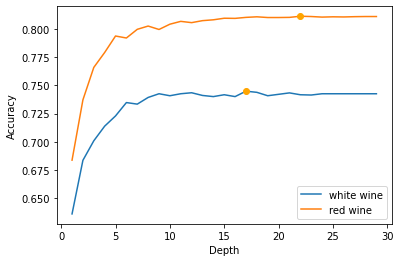

In [78]:
# find the best parameter of max_depth
# plot the image and note the best point
def RF_depth(min_depth, max_depth):
    x = [x for x in range(min_depth, max_depth)]
    scores_w, scores_r = [], []
    for depth in x:
        rfc_w = RandomForestClassifier(n_estimators = 50, max_depth = depth, random_state = 0)
        rfc_r = RandomForestClassifier(n_estimators = 50, max_depth = depth, random_state = 0)
        
        rfc_w.fit(W_train_inputs,W_train_targets)
        rfc_r.fit(R_train_inputs,R_train_targets)
        
        rfc_w_predict = rfc_w.predict(W_test_inputs)
        rfc_r_predict = rfc_r.predict(R_test_inputs)
        
        scores_w.append(accuracy_score(W_test_targets, rfc_w_predict))
        scores_r.append(accuracy_score(R_test_targets, rfc_r_predict))
    
    score_max_w = max(scores_w)
    score_max_r = max(scores_r)
    
    plt.plot(x, scores_w, label = 'white wine')
    plt.plot(x, scores_r, label = 'red wine')
    plt.plot(scores_w.index(score_max_w) + 1, score_max_w, 'o', color = 'orange')
    plt.plot(scores_r.index(score_max_r) + 1, score_max_r, 'o', color = 'orange')
    plt.xlabel('Depth')
    plt.ylabel('Accuracy')
    plt.legend()
    
RF_depth(1, 30)

In [79]:
# For testing 
# Random Forest Grid Search
from sklearn.model_selection import GridSearchCV
params = {'n_estimators' : range(1, 101), }
#params = {'max_depth': range(1, 31),}

grid_w = GridSearchCV(RandomForestClassifier(),params,refit=True,verbose=2)
grid_r = GridSearchCV(RandomForestClassifier(),params,refit=True,verbose=2)

grid_w.fit(W_train_inputs,W_train_targets)
grid_r.fit(R_train_inputs,R_train_targets)

print(grid_w.best_estimator_)
print(grid_r.best_estimator_)

ND ....................................n_estimators=51; total time=   0.2s
[CV] END ....................................n_estimators=52; total time=   0.2s
[CV] END ....................................n_estimators=52; total time=   0.2s
[CV] END ....................................n_estimators=52; total time=   0.2s
[CV] END ....................................n_estimators=52; total time=   0.2s
[CV] END ....................................n_estimators=52; total time=   0.2s
[CV] END ....................................n_estimators=53; total time=   0.2s
[CV] END ....................................n_estimators=53; total time=   0.2s
[CV] END ....................................n_estimators=53; total time=   0.2s
[CV] END ....................................n_estimators=53; total time=   0.2s
[CV] END ....................................n_estimators=53; total time=   0.2s
[CV] END ....................................n_estimators=54; total time=   0.2s
[CV] END .........................

In [80]:
# feature scores for white wine 

feature_scores_w = pd.Series(rfc100_w.feature_importances_,index = white_concat.iloc[:,:-1].columns).sort_values(ascending=False)
feature_scores_w

density_diff                 0.123361
alcohol_diff                 0.120621
volatile acidity_diff        0.110872
total sulfur dioxide_diff    0.088507
free sulfur dioxide_diff     0.087289
residual sugar_diff          0.085207
chlorides_diff               0.079996
citric acid_diff             0.079707
pH_diff                      0.079444
sulphates_diff               0.078434
fixed acidity_diff           0.066562
dtype: float64

In [81]:
# feature scores for red wine 
feature_scores_r = pd.Series(rfc100_r.feature_importances_,index = red_concat.iloc[:,:-1].columns).sort_values(ascending=False)
feature_scores_r 

alcohol_diff                 0.203683
volatile acidity_diff        0.118481
sulphates_diff               0.102960
chlorides_diff               0.085109
density_diff                 0.082984
total sulfur dioxide_diff    0.079686
residual sugar_diff          0.069091
citric acid_diff             0.066941
free sulfur dioxide_diff     0.066244
pH_diff                      0.063212
fixed acidity_diff           0.061608
dtype: float64

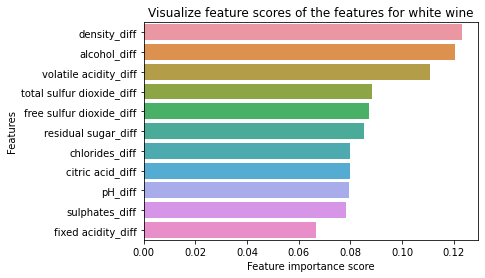

In [82]:
# Creating a seaborn bar plot for white wine 
import seaborn as sns
f, ax = plt.subplots()
ax = sns.barplot(x=feature_scores_w, y=feature_scores_w.index)
ax.set_title("Visualize feature scores of the features for white wine")
ax.set_yticklabels(feature_scores_w.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

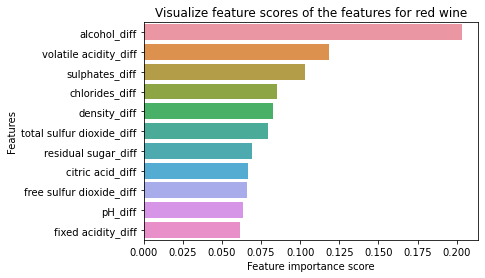

In [83]:
# Creating a seaborn bar plot for red wine 
import seaborn as sns
f, ax = plt.subplots()
ax = sns.barplot(x=feature_scores_r, y=feature_scores_r.index)
ax.set_title("Visualize feature scores of the features for red wine")
ax.set_yticklabels(feature_scores_r.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [84]:
white_concat.head()

,alcohol_diff,chlorides_diff,citric acid_diff,density_diff,fixed acidity_diff,free sulfur dioxide_diff,pH_diff,residual sugar_diff,sulphates_diff,total sulfur dioxide_diff,volatile acidity_diff,Target
0,-2.2,0.003,0.02,0.00816,1.6,4.0,-0.26,13.5,0.02,92.0,-0.07,0
1,-0.4,-0.007,0.01,0.00226,0.5,-27.0,-0.09,4.7,-0.07,-4.0,0.09,1
2,1.8,-0.010,-0.01,-0.00590,-1.1,-31.0,0.17,-8.8,-0.09,-96.0,0.16,1
3,-2.4,0.025,0.07,0.00716,1.6,18.0,-0.35,12.2,0.00,77.0,-0.01,0
4,-0.2,0.022,0.05,-0.00100,0.0,14.0,-0.09,-1.3,-0.02,-15.0,0.06,1


In [85]:
# Test: change array to dataframe to drop the less important variable 
# Transform training inputs and targets to dataframe 
R_train_inputs_df = pd.DataFrame(R_train_inputs,columns = red_concat.iloc[:,:-1].columns)
R_train_targets_df = pd.DataFrame(R_train_targets,columns = red_concat.iloc[:,-1:].columns)

# DROP the feature pH_dff
R_train_inputs_df_drop = R_train_inputs_df.drop(['pH_diff'],axis = 1)

# Transform testing inputs to dataframe and also drop the feature 
R_test_inputs_df = pd.DataFrame(R_test_inputs,columns = red_concat.iloc[:,:-1].columns)
R_test_inputs_df_drop = R_test_inputs_df.drop(['pH_diff'],axis = 1)

# instantiate the classifier with n_estimators = 100

rfc100_r_drop = RandomForestClassifier(n_estimators=100, random_state=0)


# fit the model to the training set

rfc100_r_drop.fit(R_train_inputs_df_drop,R_train_targets_df)


# Predict on the test set results

rfc100_r_drop_predict = rfc100_r_drop.predict(R_test_inputs_df_drop)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(R_test_targets, rfc100_r_drop_predict)))




Model accuracy score with 100 decision-trees : 0.8079


In [86]:
# confusion matrix 
from sklearn.metrics import confusion_matrix

cm_w = confusion_matrix(W_test_targets, rfc100_w_predict)
cm_r = confusion_matrix(R_test_targets, rfc100_r_predict)

print('Confusion matrix for white wine \n\n', cm_w)
print('\n\nConfusion matrix for red wine \n\n', cm_r)

Confusion matrix for white wine 

 [[1843 1211]
 [ 818 4068]]


Confusion matrix for red wine 

 [[1474 1037]
 [ 484 4945]]


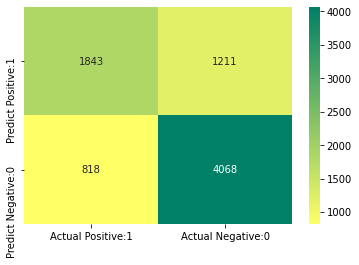

In [87]:
# Visualize confusion matrix with heatmap for white wine 

cm_matrix_w = pd.DataFrame(data=cm_w, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_w, annot=True, fmt='d',cmap = "summer_r" )


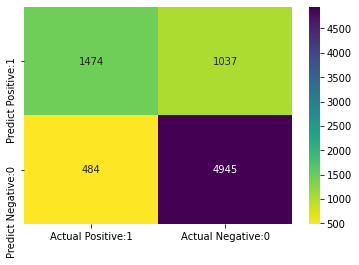

In [88]:
# Visualize confusion matrix with heatmap for red wine 

cm_matrix_r = pd.DataFrame(data=cm_r, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_r, annot=True, fmt='d',cmap = "viridis_r" )

In [89]:
# Classification Report 
from sklearn.metrics import classification_report

print("Classification Report for white wine\n\n" + classification_report(W_test_targets, rfc100_w_predict))
print("Classification Report for red wine\n\n" + classification_report(R_test_targets, rfc100_r_predict))



Classification Report for white wine

              precision    recall  f1-score   support

         0.0       0.69      0.60      0.64      3054
         1.0       0.77      0.83      0.80      4886

    accuracy                           0.74      7940
   macro avg       0.73      0.72      0.72      7940
weighted avg       0.74      0.74      0.74      7940

Classification Report for red wine

              precision    recall  f1-score   support

         0.0       0.75      0.59      0.66      2511
         1.0       0.83      0.91      0.87      5429

    accuracy                           0.81      7940
   macro avg       0.79      0.75      0.76      7940
weighted avg       0.80      0.81      0.80      7940



# Support Vector Machine 

In [90]:
# Support Vector Machine 

# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc_w=SVC() 
svc_r=SVC()


# fit classifier to training set
svc_w.fit(W_train_inputs,W_train_targets)
svc_r.fit(R_train_inputs,R_train_targets)

# make predictions on test set
svc_w_predict=svc_w.predict(W_test_inputs)
svc_r_predict=svc_r.predict(R_test_inputs)

print('Model accuracy score with default hyperparameters for white wine: {0:0.4f}'. format(accuracy_score(W_test_targets, svc_w_predict)))
print('Model accuracy score with default hyperparameters for red wine: {0:0.4f}'. format(accuracy_score(R_test_targets, svc_r_predict)))

Model accuracy score with default hyperparameters for white wine: 0.6631
Model accuracy score with default hyperparameters for red wine: 0.6890


In [91]:
# Instantite classificier with C = 100 

svc_w_100=SVC(C=100.0) 
svc_r_100=SVC(C=100.0) 


# fit classifier to training set
svc_w_100.fit(W_train_inputs,W_train_targets)
svc_r_100.fit(R_train_inputs,R_train_targets)

# make predictions on test set
svc_w_100_predict=svc_w_100.predict(W_test_inputs)
svc_r_100_predict=svc_w_100.predict(R_test_inputs)

print('Model accuracy score with C=100 for white wine: {0:0.4f}'. format(accuracy_score(W_test_targets, svc_w_100_predict)))
print('Model accuracy score with C=100 for red wine: {0:0.4f}'. format(accuracy_score(R_test_targets, svc_r_100_predict)))


Model accuracy score with C=100 for white wine: 0.7029
Model accuracy score with C=100 for red wine: 0.6899


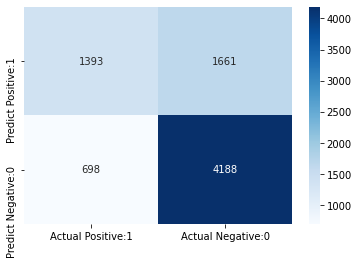

In [92]:
# Visualize confusion matrix with heatmap for SVC (white wine)

cm_svc_w = confusion_matrix(W_test_targets, svc_w_100_predict)
cm_svc_r = confusion_matrix(R_test_targets, svc_r_100_predict)


cm_matrix_svc_w = pd.DataFrame(data=cm_svc_w, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])


sns.heatmap(cm_matrix_svc_w, annot=True, fmt='d',cmap = "Blues")

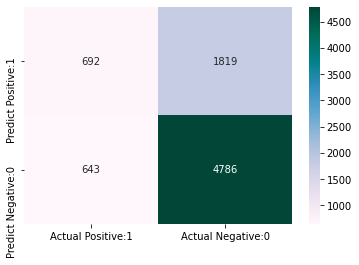

In [93]:
# Visualize confusion matrix with heatmap for SVC (red wine)
cm_matrix_svc_r = pd.DataFrame(data=cm_svc_r, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_svc_r, annot=True, fmt='d',cmap = "PuBuGn")

In [94]:

print("Classification Report for white wine\n\n" + classification_report(W_test_targets, svc_w_100_predict))
print("Classification Report for red wine\n\n" + classification_report(R_test_targets, svc_r_100_predict))


Classification Report for white wine

              precision    recall  f1-score   support

         0.0       0.67      0.46      0.54      3054
         1.0       0.72      0.86      0.78      4886

    accuracy                           0.70      7940
   macro avg       0.69      0.66      0.66      7940
weighted avg       0.70      0.70      0.69      7940

Classification Report for red wine

              precision    recall  f1-score   support

         0.0       0.52      0.28      0.36      2511
         1.0       0.72      0.88      0.80      5429

    accuracy                           0.69      7940
   macro avg       0.62      0.58      0.58      7940
weighted avg       0.66      0.69      0.66      7940



In [95]:
# For testing 
# SVM Grid Search
#params = {'C' : [0.1, 1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
params = {'C' : [0.1, 1, 10, 100],'gamma': [1,0.1,0.01,0.001],}
#params = {'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(SVC(),params,refit=True,verbose=2)

grid.fit(W_train_inputs,W_train_targets)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.3s
[CV] END .....................................C=0.1, gamma=1; total time=   0.2s
[CV] END .....................................C=0.1, gamma=1; total time=   0.2s
[CV] END .....................................C=0.1, gamma=1; total time=   0.2s
[CV] END .....................................C=0.1, gamma=1; total time=   0.3s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.3s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.3s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.3s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.2s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.3s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.2s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [96]:
print(grid.best_estimator_)


SVC(C=100, gamma=0.001)


In [97]:
grid.fit(R_train_inputs,R_train_targets)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.4s
[CV] END .....................................C=0.1, gamma=1; total time=   0.2s
[CV] END .....................................C=0.1, gamma=1; total time=   0.2s
[CV] END .....................................C=0.1, gamma=1; total time=   0.2s
[CV] END .....................................C=0.1, gamma=1; total time=   0.2s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.2s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.2s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.2s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.2s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.2s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.2s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [98]:
print(grid.best_estimator_)

SVC(C=100, gamma=0.001)


# Quick Methods Comparison

In [105]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso


In [108]:
from sklearn.model_selection import cross_val_score

models = [KNeighborsClassifier(), GaussianNB(), DecisionTreeClassifier(), SVC(),]
def evaluate_models(method, X, y, output=False):
    
    model = method
    
    scores = cross_val_score(model, X, y, cv=5)
    avg_cv = np.mean(scores)
    var_cv = np.std(scores)
    if output:
        print(model)
        print("avg cv score is:", avg_cv, "std is:", var_cv)
    return avg_cv, var_cv

for mod in models:
    evaluate_models(mod, X, y, output = True)

KNeighborsClassifier()
avg cv score is: 0.7368 std is: 0.03605634479533389
GaussianNB()
avg cv score is: 0.8390000000000001 std is: 0.017088007490635077
DecisionTreeClassifier()
avg cv score is: 0.9997 std is: 0.00024494897427829084
SVC()
avg cv score is: 0.7061 std is: 0.006829348431585564


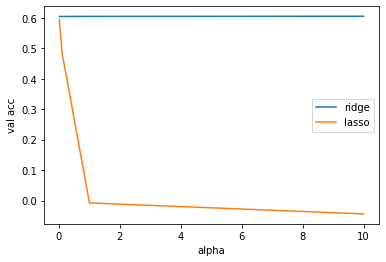

In [109]:
alphas = [0.01, 0.1, 1, 10]
ridge_vals = []
lasso_vals = []
for alpha in alphas:
    model = Ridge(alpha=alpha)
    val_acc, _= evaluate_models(model, X, y)
    ridge_vals.append(val_acc)

    model = Lasso(alpha=alpha)
    val_acc, _= evaluate_models(model, X, y)
    lasso_vals.append(val_acc)
plt.plot(alphas, ridge_vals, label = 'ridge')
plt.plot(alphas, lasso_vals, label = "lasso")
plt.xlabel("alpha")
plt.ylabel("val acc")
plt.legend()
plt.show()
    

# Cross Validation 

In [110]:
# Function for cross validation 
def cross_validation(model, X, y, cv):
    Xfolds = np.split(X, cv)
    yfolds = np.split(y, cv)
    cross_vals = []
    for fold in range(cv):
        y_test = yfolds[fold]
        X_test = Xfolds[fold]
        
        X_train_temp = Xfolds[:fold]
        X_train_temp.extend(Xfolds[fold+1:])
        X_train = np.vstack(X_train_temp)
        y_train_temp = yfolds[:fold]
        y_train_temp.extend(yfolds[fold+1:])
        y_train = np.hstack(y_train_temp)
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)
        val_acc = accuracy_score(y_test, y_predict)
        cross_vals.append(val_acc)
    return cross_vals

In [111]:
# use of it 
model = RandomForestClassifier(n_estimators = 36, random_state = 0)
cross_validation(model, X, y, cv=5)

[0.9975, 0.9705, 0.982, 0.991, 0.9975]